# WEP24-MLB: Classification and Algorithmic Fairness

In the first part we will try to classify handwritten digits by using multiple Machine Learning methods.

## 1. Classifying Handwritten Digits


**1.1 Looking at the data**

Start by importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Load the data
mnist_data = pd.read_csv('sample_data/mnist_train_small.csv').values
mnist_data = pd.DataFrame(mnist_data)

In [4]:
#How many examples are present in the data?
print(len(mnist_data))

19999


In [5]:
#Show the the first 5 rows of the data using the head()-function
mnist_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Print one instance from the data
np.array(mnist_data.loc[0])

array([  5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  28,  59,  50,   0,
        23,   0,   0,  32, 134, 180, 254, 206,   8,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   4,  96, 216, 23

In [7]:
#Show the number of times each digit is in the data.
mnist_data[0].value_counts()

1    2243
7    2126
6    2038
9    2023
3    2021
2    1989
0    1962
4    1924
8    1912
5    1761
Name: 0, dtype: int64

In [8]:
#Here we split the the data into the labels and the features
digits = mnist_data[0]
pixels = mnist_data.drop(0, axis=1)
print("Shape of labels = ", np.shape(digits))
print("Shape of features = ", np.shape(pixels))

Shape of labels =  (19999,)
Shape of features =  (19999, 784)


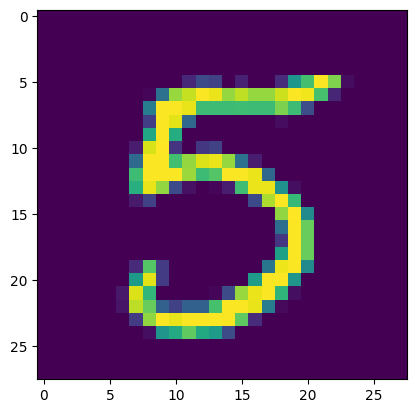

Label =  5
Pixel values =  1      0
2      0
3      0
4      0
5      0
      ..
780    0
781    0
782    0
783    0
784    0
Name: 0, Length: 784, dtype: int64


In [9]:
#This output shows you the label and the pixel values of an example image.
plt.imshow(pixels.loc[0].values.reshape(28,28))
plt.show()
print("Label = ", digits[0])
print("Pixel values = ", pixels.loc[0])

**1.2 Splitting the data into train and test sets**

In the next step we will split the data into a train set and a test set. We will use sklearn's function called 'train_test_split'. We want the train set to be 70% of the data, and the test set 30%. Look at the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and try to find out what needs to be filled in below.

In [10]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pixels, digits, test_size=0.3)

In [11]:
'''
TODO: check if the datasets have the intended number of records?
'''
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(13999, 784)
(13999,)
(6000, 784)
(6000,)


**1.3 Logistic Regression**

Now we can create a Logistic Regression classifier. We will use LogisticRegression(solver='saga'). You can leave other parameters to their default values. Instantiate the classifier, fit the model and make a prediction.

You can look at the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) for more information .


In [13]:
from sklearn.linear_model import LogisticRegression
'''
TODO: Instantiate the classifier, fit the model and make a prediction.
'''
clf_LR = LogisticRegression(solver='saga')
clf_LR.fit(X_train, y_train)
pred_LR = clf_LR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [14]:
n = 4012
y_new = y_test.reset_index()
p_classes = clf_LR.predict_proba(X_test)
print(y_new.loc[n])
print([round(a, 4) for a in p_classes[n]])
print(pred_LR[n])

index    3295
0           2
Name: 4012, dtype: int64
[0.0, 0.0, 0.9999, 0.0, 0.0, 0.0, 0.0001, 0.0, 0.0, 0.0]
2


To evaluate the performance of the classifier we can look at the accuracy. Look at the documentation for the [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to calculate the accuracy.

In [15]:
from sklearn.metrics import accuracy_score
#Calculate the accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)
print("Accuracy = ", round(accuracy_LR * 100, 2))

Accuracy =  90.32


Plot the confusion matrix to see how often the digits get classified correctly, and what mistakes were made. (You can use [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics)). Try to determine which digits often get mistaken for each other.

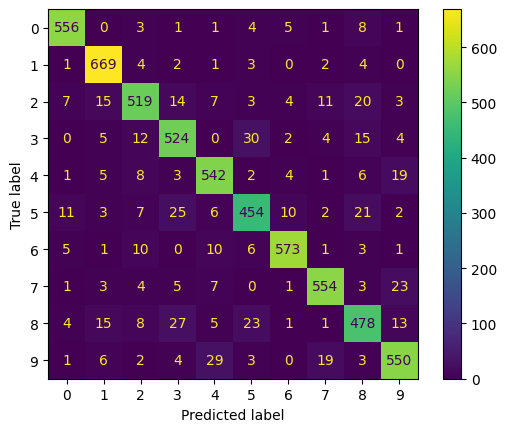

In [16]:
from sklearn.metrics import confusion_matrix
#Create the confusion matrix
cm_LR = confusion_matrix(y_test, pred_LR)

#Which digits get often confused for each other?
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_LR)
disp.plot()

**1.4 Random Forest**

Similar to the Logistic Regression classifier, we can make a [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifier.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Instantiate the classifier, fit the model and make a prediction.
clf_RF = RandomForestClassifier()
clf_RF.fit(X_train, y_train)
pred_RF = clf_RF.predict(X_test)

In [ ]:
accuracy_RF = accuracy_score(y_test, pred_RF)
print("Accuracy = ", round(accuracy_RF * 100, 2))

In [ ]:
#Create the confusion matrix
cm_RF = confusion_matrix(y_test, pred_RF)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF)
disp.plot()

**1.5 Neural Network**

Finally, we will train a neural network for the classification task. We will use a [Multi-Layer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) classifier.


In [ ]:
from sklearn.neural_network import MLPClassifier
#Instantiate the classifier, fit the model and make a prediction.
clf_NN = MLPClassifier()
clf_NN.fit(X_train, y_train)
pred_NN = clf_NN.predict(X_test)

In [ ]:
accuracy_NN = accuracy_score(y_test, pred_NN)
print("Accuracy = ", round(accuracy_NN * 100, 2))

In [ ]:
#Create the confusion matrix
cm_NN = confusion_matrix(y_test, pred_NN)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_NN)
disp.plot()

## 2. Measuring the bias in datasets

In this part we will look at the GERMAN dataset. More information about the dataset can be found [here](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data).

**2.1 Loading the data**



In [ ]:
!pip install aif360
!pip install 'aif360[LawSchoolGPA]'
!pip install 'aif360[AdversarialDebiasing]'
'''
There are other fairness algorithms in the library fairlearn.
You can install that library using:
!pip install fairlearn
'''

In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
from copy import deepcopy

In [ ]:
from aif360.datasets import GermanDataset

We need to check the version of the Python that we are using before downloading the data. The dataset should be copied into the correct in the virtual enviroment.

In [ ]:
!python --version

The following commands work on Google Colab environment. If you are using a different IDE, you need to figure out how to download the dataset and copy it to the correct location.

In [ ]:
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc
!mv german.data /usr/local/lib/python3.10/dist-packages/aif360/data/raw/german
!mv german.doc /usr/local/lib/python3.10/dist-packages/aif360/data/raw/german

**2.2 Looking at the data**

In [ ]:
'''
Read the dataset
'''
german_data = GermanDataset()

In [ ]:
'''
What is the label, and what does the label mean?
'''
label = german_data.label_names
fav = german_data.favorable_label
unfav = german_data.unfavorable_label
print("Label = ", label)
print("Favorable label = ", fav)
print("Unfavorable label = ", unfav)

In [ ]:
'''
We extract a datframe from the dataset for better visualization
'''
german_df = german_data.convert_to_dataframe()
german_df = german_df[0]
german_df

In the data, sex is divided in 0 = Female, and 1 = Male. Age is divided into 0 <= 25, and 1 > 25.

In [ ]:
'''
Let's look at the distribution of the data and the class labels.
What do you observe?
'''
german_data.convert_to_dataframe()[0].groupby(['age','sex','credit'])['credit'].count()

In [ ]:
priv_group   = [{'age': 1, 'sex' : 1}]  # Men with age > 25
unpriv_group = [{'age': 0, 'sex': 0}]  # Women with age <= 25

In [ ]:
'''
The base rate tells you the percentage of positive outcomes. What do you notice?
'''
metric_orig = BinaryLabelDatasetMetric(german_data,
                                       unprivileged_groups=unpriv_group,
                                       privileged_groups=priv_group)
print("Percentage of positive outcomes for the unprivileged group = ",
      round(metric_orig.base_rate(False) * 100, 2))
print("Percentage of positive outcomes for the privileged group = ",
      round(metric_orig.base_rate(True) * 100, 2))

**2.3 Training a classifier**

We have looked at the original data. But what happens if we train a classifier on this biased dataset?

Start by splitting the data in a train and a test sets.

In [ ]:
train_data, test_data = german_data.split([0.8], shuffle=True)
X_train = train_data.features
y_train = train_data.labels.ravel()
X_test = test_data.features
y_test = test_data.labels

We will look at the base rates in the train and the test data.

In [ ]:
'''
TODO: Check the base rate for the training data
'''
metric_train = BinaryLabelDatasetMetric(train_data,
                                        unprivileged_groups=unpriv_group,
                                        privileged_groups=priv_group)
print("Percentage of positive outcomes for the unprivileged group = ",
      round(metric_train.base_rate(False) * 100, 2))
print("Percentage of positive outcomes for the privileged group = ",
      round(metric_train.base_rate(True) * 100, 2))

In [ ]:
'''
TODO: Check the base rate for the test data
'''
metric_test = BinaryLabelDatasetMetric(test_data,
                                       unprivileged_groups=unpriv_group,
                                       privileged_groups=priv_group)
print("Percentage of positive outcomes for the unprivileged group = ",
      round(metric_test.base_rate(False) * 100, 2))
print("Percentage of positive outcomes for the privileged group = ",
      round(metric_test.base_rate(True) * 100, 2))

In [ ]:
'''
TODO: train a LogisticRegression classifier
'''
clf_LR_german = LogisticRegression()
clf_LR_german.fit(X_train, y_train)
pred_german = test_data.copy(deepcopy = True)
pred_german.labels = clf_LR_german.predict(X_test)

In [ ]:
'''
Evaluate the model
'''
print('Accuracy = ', accuracy_score(y_test, pred_german.labels))
cm = confusion_matrix(y_test, pred_german.labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
'''
Now look at the percentage of positive outcomes for both groups in the predictions.
What happened?
'''
metric2 = BinaryLabelDatasetMetric(pred_german,
                                   unprivileged_groups=unpriv_group,
                                   privileged_groups=priv_group)
print("Percentage of positive outcomes for the unprivileged group = ",
      round(metric2.base_rate(False) * 100, 2))
print("Percentage of positive outcomes for the privileged group = ",
      round(metric2.base_rate(True) * 100, 2))

## 3. Measuring the bias in classifier's outcome

In the final part we will look at the fairness of the classifier trained on the GERMAN dataset. We create a [ClassificationMetric](https://aif360.readthedocs.io/en/latest/modules/generated/aif360.metrics.ClassificationMetric.html) object, and use its methods to calculate multiple fairness measures.

In [ ]:
'''
We create a ClassificationMetric class to measure the fairness of
the classifier's outcomes
'''
fairness_metric = ClassificationMetric(test_data, pred_german,
                                       unprivileged_groups= unpriv_group,
                                       privileged_groups= priv_group)

In [ ]:
'''
Calculate the Statistical Parity difference and the Disparate Impact (ratio)
'''
statistical_parity_difference = fairness_metric.statistical_parity_difference()
disparate_impact = fairness_metric.disparate_impact()
print("statistical parity difference =", abs(round(statistical_parity_difference,2)))
print("disparate impact =", round(disparate_impact,2))

In [ ]:
'''
Calculate the True Positive Rate for the privileged and the unprivileged group,
and their differences
'''
TPR_priv = fairness_metric.true_positive_rate(privileged=True)
TPR_unpriv = fairness_metric.true_positive_rate(privileged=False)
TPR_difference = fairness_metric.true_positive_rate_difference()
print("TPR (priv_group) =", round(TPR_priv, 2)) #TPR for privileged group
print("TPR (unpriv_group) =", round(TPR_unpriv, 2)) #TPR for unprivileged group
print("TPR difference =", abs(round(TPR_difference, 2))) #TPR difference

In [ ]:
#Use the consistency metric to calculate individual fairness
consistency = fairness_metric.consistency()
print("The consistency is an individual fairness metric.")
print("It measures how similar the labels are for similar instances = ",
      round(consistency[0] * 100, 2))